In [1]:
from collections import defaultdict
from random import randrange
from operator import itemgetter
import networkx as nx
import matplotlib.pyplot as plt
import re

class Graph:
    '''
    Graph class that accpets file path as an argument
    '''
    
    def __init__(self, path):
#         # Dictionary of pointers of all vertices in th graph
#         self._graph_object = {}
        # Dictionary of all vertices name
        self._graph = {}
        self._coordinates = self.read_tsp_file(path)
        self._cities = [*self._coordinates.keys()]
        self._size = len(self._cities)
        self._distances = self.compute_distances()
        

    def read_tsp_file(self, path):
        """"
        Read TSP file
        """
        city_list = []

        with open(path, 'r') as f:
            _data = re.findall(r'\n([0-9].*)', f.read())

        # Split each line by space and convert to float
        for line in _data:
            city_list.append(tuple(map(float, line.split())))
        return { int(vertex): (x,y) for vertex, x, y in city_list }
    
    def euclidean_distance(self, cityA, cityB):
        """
        Formula to calculate the Euclidean distance 
        """
        # Math library
        import math
        
        x1 = self._coordinates[cityA][0]
        y1 = self._coordinates[cityA][1]
        x2 = self._coordinates[cityB][0]
        y2 = self._coordinates[cityB][1]
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
        # add node k between node i and node j
    def add(self, i, j, k):
        print(f'I: {i} - {self._distances[i][k]} K {k} - {self._distances[k][j]}  J {j} - {self._distances[i][j]}')
        print(round(self._distances[i][k] + self._distances[k][j] - self._distances[i][j], 2))
        return round(self._distances[i][k] + self._distances[k][j] - self._distances[i][j], 2)

    
    def compute_distances(self):
        self.distances = defaultdict(dict)
        for cityA in self._cities:
            for cityB in self._cities:
                if cityA != cityB and cityB not in self.distances[cityA]:
#                 if cityB not in self.distances[cityA]:
                    distance = self.euclidean_distance(cityA, cityB)
                    self.distances[cityA][cityB] = round(distance, 2)
                    self.distances[cityB][cityA] = round(distance, 2)
        return self.distances
    
    
    def closest_neighbor(self, tour, node, in_tour=False):
        neighbors = self._distances[node]
#         print(neighbors.items())
        current_dist = [(c, d) for c, d in neighbors.items()
                        if (c in tour if in_tour else c not in tour)]
        return sorted(current_dist, key=itemgetter(1))[-0]
#         return sorted(current_dist, key=itemgetter(1))[-farthest]

    def format_solution(self, solution):
        return [self._coordinates[city] for city in solution]
    
    
    def nearest_insertion(self):
        # Choose ramdom city
        city = randrange(1, self._size)
#         city = 5
        print(f'Random city: {city}')
        tour, tours = [city], []
        print(f'Tour: {tour}\nTours: {tours}')
        # Find the closest node to the first random node which is not in the tour yet
        neighbor, distance = self.closest_neighbor(tour, city, False)
        print(f'Closest Neighbor: {neighbor}\nDistance: {distance}')
        tour.append(neighbor)
        tour_length = distance
        print(f'Tour: {tour}\nTours length: {tour_length}')
        count = 0
        while len(tour) != len(self._cities):
            best, dist = None, float('inf')
#             print(f'Best: {best}\nDist: {dist}')
            
            # (selection step) given a sub-tour,we find node r not in the
            # sub-tour closest to any node j in the sub-tour,
            # i.e. with minimal c_rj
            for candidate in self._cities:
                if candidate in tour:
                    continue
                # we consider only the distances to nodes already in the tour
                _, length = self.closest_neighbor(tour, candidate, True)
                print(length)
                if length < dist:
                    best, dist = candidate, length
            count += 1
            print(f'Best: {best}\nDist: {dist}')
            if count == len(self._cities):
                break
            # (insertion step) we find the arc (i, j) in the sub-tour which
            # minimizes cir + crj - cij, and we insert r between i and j
            idx, dist = None, float('inf')
            print(f'Old Tour: {tour}')
            tour = tour + [tour[0]]
            print(f'New Tour: {tour}')
            for i in range(len(tour) - 1):
                add = self.add(tour[i], tour[i + 1], best)
#                 print(f'Add: {add}')
                if add < dist:
                    idx, dist = i, add
            tour_length += self.add(tour[idx], tour[idx + 1], best)
            tours.append(tour)
            print(f'BEFORE: {tour}')
            tour.insert(idx + 1, best)
            print(f'AFTER: {tour}')
            tour = tour[:-1]
            print("\nFIRTS LOOP COMPLETED\n")
        tour_length += self._distances[tour[0]][tour[-1]]
        print(f'Final tour: {tours}')
#         best_lengths = list(map(self._compute_length, tours))
        tour_coord = [self.format_solution(step) for step in tours]
#         return [self.format_solution(step) for step in tours]
        return [tours, tour_coord]


# Instantiate graph 
graph = Graph('Random30.tsp')
print(graph._coordinates, '\n')
print(graph._cities[-2], '\n')
print(graph._distances[5], '\n')
# print(graph.closest_neighbor([4], 5, True))
test = graph.nearest_insertion()
print(test[0])

{1: (87.951292, 2.658162), 2: (33.466597, 66.682943), 3: (91.778314, 53.807184), 4: (20.526749, 47.63329), 5: (9.006012, 81.185339), 6: (20.03235, 2.761925), 7: (77.18131, 31.922361), 8: (41.059603, 32.578509), 9: (18.692587, 97.01529), 10: (51.658681, 33.808405), 11: (44.563128, 47.541734), 12: (37.80633, 50.599689), 13: (9.961241, 20.337535), 14: (28.186895, 70.415357), 15: (62.129582, 6.18305), 16: (50.376904, 42.796106), 17: (71.285134, 43.671987), 18: (34.156316, 49.113437), 19: (85.201575, 71.837519), 20: (27.466659, 1.394696), 21: (97.985778, 44.746239), 22: (40.730003, 98.40083), 23: (73.79986, 61.076693), 24: (85.076449, 17.029328), 25: (16.052736, 11.899167), 26: (20.160527, 67.23838), 27: (22.730186, 99.725333), 28: (77.19657, 88.503677), 29: (18.494217, 31.971191), 30: (72.743919, 16.071047)} 

29 

{1: 111.35, 2: 28.44, 3: 87.18, 4: 35.47, 6: 79.19, 7: 84.11, 8: 58.22, 9: 18.56, 10: 63.75, 11: 48.95, 12: 42.01, 13: 60.86, 14: 22.0, 15: 91.91, 16: 56.44, 17: 72.7, 18: 40.76

I: 8 - 65.82 K 22 - 65.51  J 10 - 10.67
120.66
I: 10 - 65.51 K 22 - 62.68  J 17 - 21.97
106.22
I: 17 - 62.68 K 22 - 75.82  J 7 - 13.15
125.35
I: 7 - 75.82 K 22 - 88.34  J 30 - 16.46
147.7
I: 30 - 88.34 K 22 - 94.67  J 15 - 14.51
168.5
I: 15 - 94.67 K 22 - 106.75  J 1 - 26.06
175.36
I: 1 - 106.75 K 22 - 92.67  J 24 - 14.66
184.76
I: 24 - 92.67 K 22 - 78.47  J 21 - 30.58
140.56
I: 21 - 78.47 K 22 - 67.78  J 3 - 10.98
135.27
I: 14 - 30.67 K 22 - 18.05  J 27 - 29.81
18.91
BEFORE: [3, 19, 28, 23, 2, 14, 27, 9, 5, 26, 12, 18, 4, 13, 25, 6, 20, 29, 11, 16, 8, 10, 17, 7, 30, 15, 1, 24, 21, 3]
AFTER: [3, 19, 28, 23, 2, 14, 22, 27, 9, 5, 26, 12, 18, 4, 13, 25, 6, 20, 29, 11, 16, 8, 10, 17, 7, 30, 15, 1, 24, 21, 3]

FIRTS LOOP COMPLETED

Final tour: [[3, 19, 21, 3], [3, 19, 23, 21, 3], [3, 19, 23, 17, 21, 3], [3, 19, 23, 17, 7, 21, 3], [3, 19, 23, 17, 7, 30, 21, 3], [3, 19, 23, 17, 7, 30, 24, 21, 3], [3, 19, 23, 17, 7, 30, 15, 24, 21, 3], [3, 19, 23, 17, 7, 30, 15, 1, 24, 21, 3], [3, 19, 28, 23, 

[(87.951292, 2.658162), (33.466597, 66.682943), (91.778314, 53.807184), (20.526749, 47.63329), (9.006012, 81.185339), (20.03235, 2.761925), (77.18131, 31.922361), (41.059603, 32.578509), (18.692587, 97.01529), (51.658681, 33.808405), (44.563128, 47.541734), (37.80633, 50.599689), (9.961241, 20.337535), (28.186895, 70.415357), (62.129582, 6.18305), (50.376904, 42.796106), (71.285134, 43.671987), (34.156316, 49.113437), (85.201575, 71.837519), (27.466659, 1.394696), (97.985778, 44.746239), (40.730003, 98.40083), (73.79986, 61.076693), (85.076449, 17.029328), (16.052736, 11.899167), (20.160527, 67.23838), (22.730186, 99.725333), (77.19657, 88.503677), (18.494217, 31.971191), (72.743919, 16.071047)] 



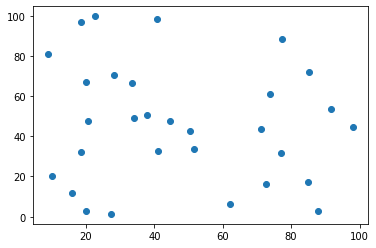

In [2]:
print(list(graph._coordinates.values()), '\n')
x = [coord[0] for coord in graph._coordinates.values()]
y = [coord[1] for coord in graph._coordinates.values()]

# print(x)

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

[(91.778314, 53.807184), (85.201575, 71.837519), (73.79986, 61.076693), (71.285134, 43.671987), (77.18131, 31.922361), (97.985778, 44.746239), (91.778314, 53.807184)]


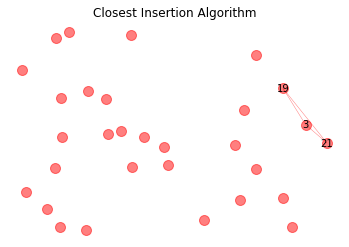

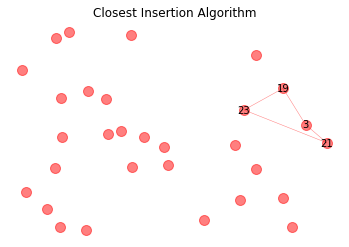

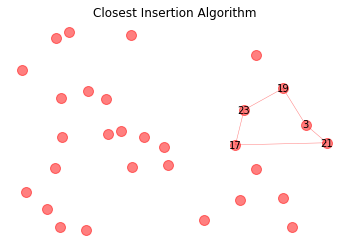

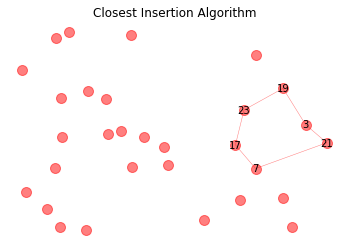

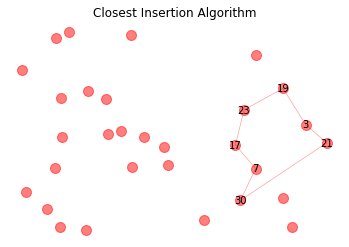

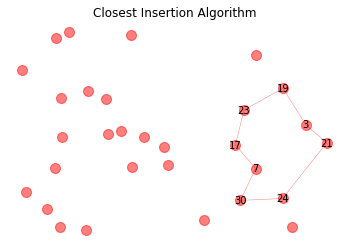

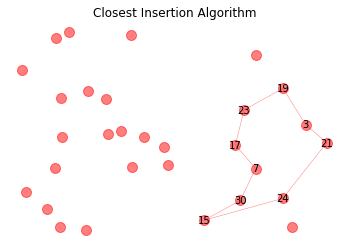

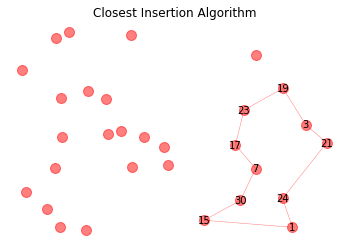

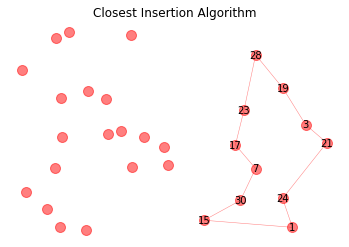

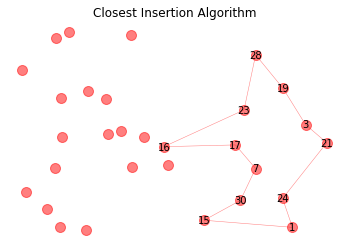

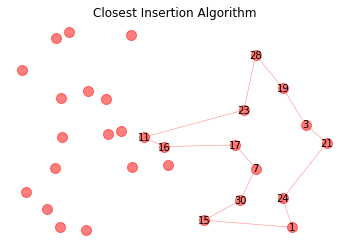

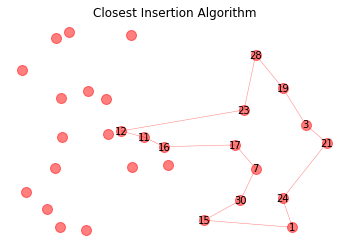

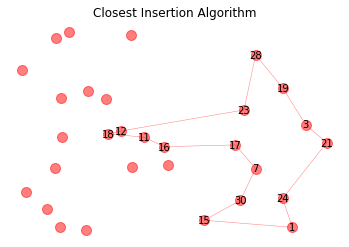

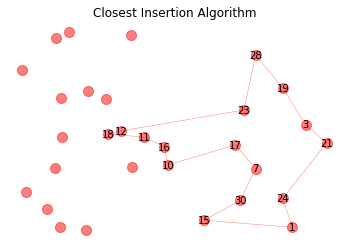

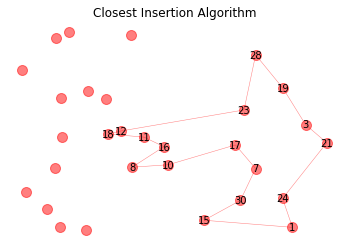

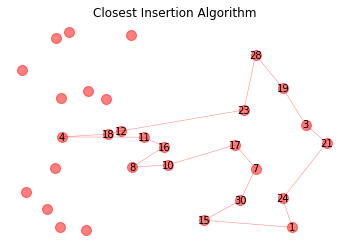

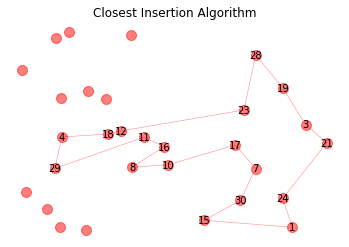

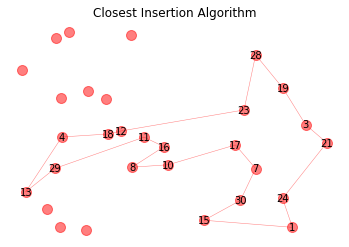

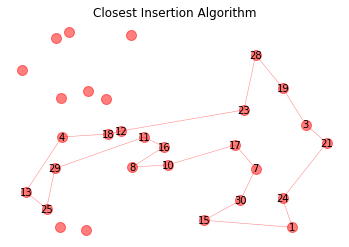

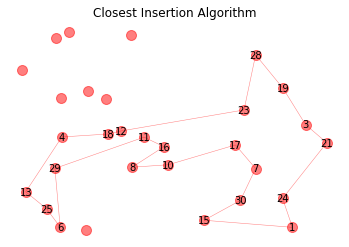

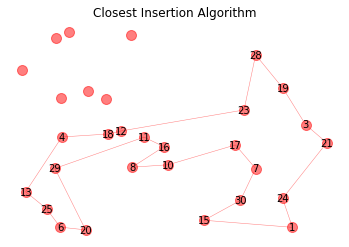

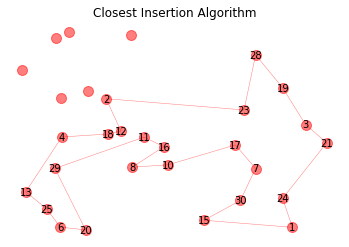

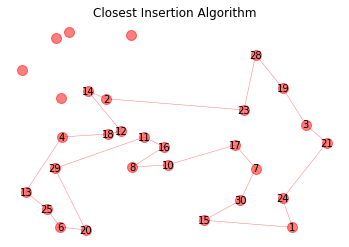

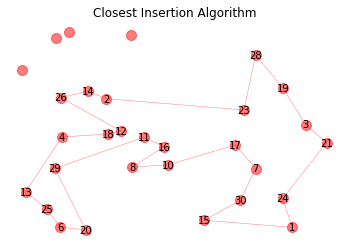

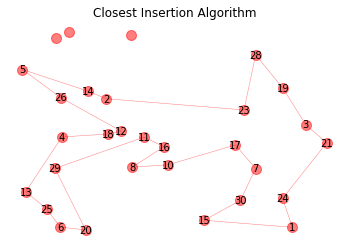

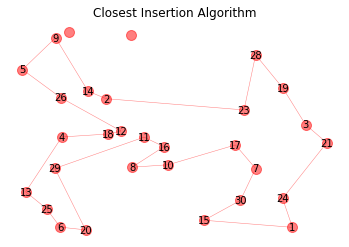

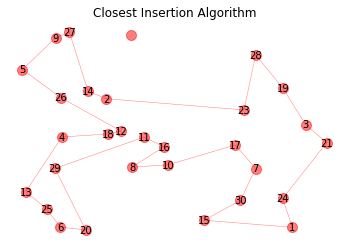

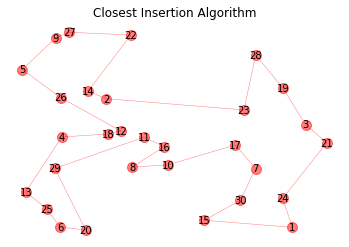

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import os
import time

def draw_closest_insert(tours, coordinates, pos, index): 
    G = nx.Graph()
#         tours = test[0][i]
#         coordinates = test[1][i]
    # pos = nx.shell_layout(G)

    # # Drow weights to each edge
    # nx.draw_networkx_edge_labels(G, pos, font_size=8)

    # print(tours)
    # print(coordinates)

    for i in range(len(tours)-1):
        G.add_edge(tours[i], tours[i+1], weight = graph._distances[tours[i]][tours[i+1]])

    #     print(tours[i] , tours[i+1])
    #     print(graph._distances[tours[i]][tours[i+1]])
    # print(G.edges())

    # Get position layout
#     pos = {c:d for c,d in list(zip(tours, coordinates))[:len(tours)-1]}
#     print(list(pos.keys())
    # Get weight for each eadge 
    labels = nx.get_edge_attributes(G,'weight')
#     print(labels)
    # Drow weights to each edge
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
    options = {"node_size": 100, "alpha": 0.5}
    nx.draw_networkx_nodes(G, pos, nodelist=list(pos.keys()), node_color="r", **options)
    # Draw in red edges that are not in shortest path
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=G.edges(),
        width=0.5,
        alpha=0.5,
        edge_color="r",
    )
    plt.figure(1,figsize=(12,12))
#     nx.draw(G,pos,font_size=10)

    plt.axis("off")
    # Draw lables in the node
#     print(pos)
    nx.draw_networkx_labels(G,pos, font_size=10)

    plt.title('Closest Insertion Algorithm')
    plt.savefig(f'project_3_{index}.png')
    plt.show()

# print(graph._coordinates)
# print(tuple(graph._coordinates.values()) + ) 
test2 = {k : tuple(e + 50 for e in v) for k,v in graph._coordinates.items()}
print(test[1][3])
for i in range(len(test[0])):
    draw_closest_insert(test[0][i], test[1][i], graph._coordinates, f'{i:02d}')
#     time.sleep(1)
# draw_closest_insert(test[0][1], test[1][1], test2)
# # draw_closest_insert(test[0][27], test[1][27])

In [143]:
# from pathlib import Path
# image_path = Path("test")
# images = list(image_path.glob('*.png'))
# print(images_path)
# image_list = []
# for file_name in images:
#     image_list.append(imageio.imread(file_name))

import os
import imageio
# os.path.abspath("C:/example/cwd/mydir/myfile.txt")
# 'C:/example/cwd/mydir/myfile.txt'
image_list = []
filelist= sorted([os.path.abspath(file) for file in os.listdir() if file.endswith('.png')])
for file_name in filelist:
    image_list.append(imageio.imread(file_name))
    

kargs = { 'duration': 1 }
imageio.mimwrite('animated_from_images.gif', image_list, **kargs)


In [145]:
# from IPython.display import Image
# Image(url='animated_from_images.gif')  

![football](animated_from_images.gif "football")

<img src="animated_from_images.gif">